# Data exploration

Source of dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [2]:
# import modules and set options
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

pd.options.display.max_rows = 100 #default = 60
sns.set_theme(style="whitegrid")

In [3]:
# load csv dataset into DataFrame
vehicles = pd.read_csv('vehicles.csv', nrows=100000)

In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            100000 non-null  int64  
 1   url           100000 non-null  object 
 2   region        100000 non-null  object 
 3   region_url    100000 non-null  object 
 4   price         100000 non-null  int64  
 5   year          99572 non-null   float64
 6   manufacturer  95580 non-null   object 
 7   model         98715 non-null   object 
 8   condition     61711 non-null   object 
 9   cylinders     59841 non-null   object 
 10  fuel          99397 non-null   object 
 11  odometer      98479 non-null   float64
 12  title_status  97721 non-null   object 
 13  transmission  99486 non-null   object 
 14  VIN           63962 non-null   object 
 15  drive         69526 non-null   object 
 16  size          27846 non-null   object 
 17  type          80389 non-null   object 
 18  paint

In [5]:
vehicles.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
99995,7309358353,https://jacksonville.craigslist.org/ctd/d/jack...,jacksonville,https://jacksonville.craigslist.org,49395,2019.0,chevrolet,silverado trail boss,new,8 cylinders,...,full-size,pickup,red,https://images.craigslist.org/00x0x_cg9hmWpOhy...,"*** MINT CONDITION *** BRAND NEW 7"" PRO COMP. ...",NaN,fl,30.207288,-81.738969,2021-04-19T13:50:58-0400
99996,7309358251,https://jacksonville.craigslist.org/ctd/d/jack...,jacksonville,https://jacksonville.craigslist.org,18590,2018.0,kia,sportage lx sport utility 4d,good,NaN,...,NaN,other,silver,https://images.craigslist.org/00o0o_4QCkqtOcFy...,Carvana is the safer way to buy a car During t...,NaN,fl,30.330000,-81.650000,2021-04-19T13:50:50-0400
99997,7309355294,https://jacksonville.craigslist.org/ctd/d/jack...,jacksonville,https://jacksonville.craigslist.org,49495,2019.0,chevrolet,silverado trail boss,new,8 cylinders,...,full-size,pickup,red,https://images.craigslist.org/00x0x_cg9hmWpOhy...,"*** MINT CONDITION *** BRAND NEW 7"" PRO COMP. ...",NaN,fl,30.207288,-81.738969,2021-04-19T13:46:36-0400
99998,7309354677,https://jacksonville.craigslist.org/ctd/d/jack...,jacksonville,https://jacksonville.craigslist.org,24495,2014.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,...,full-size,truck,white,https://images.craigslist.org/00f0f_djNCWjHFxp...,*** MINT CONDITION *** CLEAN CARFAX - NO ACCID...,NaN,fl,30.207288,-81.738969,2021-04-19T13:45:40-0400
99999,7309345725,https://jacksonville.craigslist.org/ctd/d/1989...,jacksonville,https://jacksonville.craigslist.org,12999,1989.0,jeep,wrangler,excellent,4 cylinders,...,compact,convertible,red,https://images.craigslist.org/00v0v_98ytOxORM0...,....WE HAVE MANY CLASSIC JEEPS @ EZCustom4x4.c...,NaN,fl,28.712000,-81.355200,2021-04-19T13:33:00-0400


### Remove some columns
For now we are not interested in some columns, like for example all hyperlinks (since most of them are expired anyways), as well as all columns that don't have any values like county.
For our further data exploration we decide to remove these columns to get a better overview of the data

(Keep in mind that we might be able to extract the region from the url, should the dedicated region feature show problems)

In [6]:
df = vehicles.drop(['image_url', 'county', 'region_url', 'url', 'id'], axis=1)

In [7]:
df.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
99995,jacksonville,49395,2019.0,chevrolet,silverado trail boss,new,8 cylinders,gas,12700.0,clean,...,1GCPYCEF1KZ338219,4wd,full-size,pickup,red,"*** MINT CONDITION *** BRAND NEW 7"" PRO COMP. ...",fl,30.207288,-81.738969,2021-04-19T13:50:58-0400
99996,jacksonville,18590,2018.0,kia,sportage lx sport utility 4d,good,NaN,other,20005.0,clean,...,KNDPMCACXJ7395729,NaN,NaN,other,silver,Carvana is the safer way to buy a car During t...,fl,30.330000,-81.650000,2021-04-19T13:50:50-0400
99997,jacksonville,49495,2019.0,chevrolet,silverado trail boss,new,8 cylinders,gas,12700.0,clean,...,1GCPYCEF1KZ338219,4wd,full-size,pickup,red,"*** MINT CONDITION *** BRAND NEW 7"" PRO COMP. ...",fl,30.207288,-81.738969,2021-04-19T13:46:36-0400
99998,jacksonville,24495,2014.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,100166.0,clean,...,1GCVKREC7EZ391819,4wd,full-size,truck,white,*** MINT CONDITION *** CLEAN CARFAX - NO ACCID...,fl,30.207288,-81.738969,2021-04-19T13:45:40-0400
99999,jacksonville,12999,1989.0,jeep,wrangler,excellent,4 cylinders,gas,111000.0,clean,...,NaN,4wd,compact,convertible,red,....WE HAVE MANY CLASSIC JEEPS @ EZCustom4x4.c...,fl,28.712000,-81.355200,2021-04-19T13:33:00-0400


In [8]:
# Stats of numerical features
df.describe(include=[np.number])

,price,year,odometer,lat,long
count,1.000000e+05,99572.000000,9.847900e+04,99461.000000,99461.000000
mean,1.110640e+05,2010.944261,9.644995e+04,36.794858,-107.618131
std,1.471778e+07,10.056314,2.323362e+05,5.975301,18.335293
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-158.599600
25%,5.999000e+03,2008.000000,3.665700e+04,33.779214,-120.699752
50%,1.399500e+04,2013.000000,8.254300e+04,36.400000,-116.359028
75%,2.599000e+04,2017.000000,1.300000e+05,38.890000,-88.266700
max,3.024942e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [9]:
# Stats of categorical features
df.describe(include=['object'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
count,100000,95580,98715,61711,59841,99397,97721,99486,63962,69526,27846,80389,70224,99961,100000,99962
unique,84,41,12615,6,8,5,6,3,34778,3,4,13,12,86285,18,94277
top,fresno / madera,ford,f-150,good,6 cylinders,gas,clean,automatic,5B4KPD27X83433783,fwd,full-size,sedan,white,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-17T17:44:55-0700
freq,2983,14919,1460,27631,21925,82914,95035,77755,58,26862,14353,22740,20575,83,50614,8


Next, let's look at some of these features in greater detail...

### Categorical data:

In [10]:
# Region stats
df[['region']].value_counts(normalize=False)

region                  
fresno / madera             2983
stockton                    2977
modesto                     2973
sacramento                  2970
washington, DC              2970
tucson                      2969
phoenix                     2960
ft myers / SW florida       2955
san diego                   2953
orange county               2952
denver                      2952
inland empire               2950
los angeles                 2937
SF bay area                 2936
colorado springs            2914
reno / tahoe                2876
anchorage / mat-su          2742
hartford                    2564
bakersfield                 2528
redding                     2526
ventura county              2518
fort collins / north CO     2385
jacksonville                2134
palm springs                1978
little rock                 1841
yuba-sutter                 1747
birmingham                  1647
new haven                   1644
daytona beach               1633
chico             

In [11]:
# manufacturer stats
df[['manufacturer']].value_counts(normalize=False)

manufacturer   
ford               14919
chevrolet          11752
toyota              9512
honda               5627
nissan              4854
jeep                3998
bmw                 3773
ram                 3739
mercedes-benz       3487
gmc                 3286
dodge               2956
hyundai             2617
volkswagen          2523
lexus               2435
subaru              2411
kia                 2157
audi                1814
acura               1543
cadillac            1434
mazda               1369
chrysler            1164
infiniti            1163
volvo                960
buick                917
lincoln              789
mini                 690
mitsubishi           640
rover                598
jaguar               444
porsche              395
pontiac              330
fiat                 270
mercury              243
alfa-romeo           235
tesla                233
saturn               201
harley-davidson       42
ferrari               26
datsun                21
aston-mar

In [12]:
# condition stats
df[['condition']].value_counts(normalize=False)

condition
good         27631
excellent    27146
like new      4867
fair          1622
new            274
salvage        171
dtype: int64

In [13]:
# cylinders stats
df[['cylinders']].value_counts(normalize=False)

cylinders   
6 cylinders     21925
4 cylinders     20001
8 cylinders     16434
other             420
5 cylinders       417
10 cylinders      393
3 cylinders       193
12 cylinders       58
dtype: int64

In [14]:
# fuel stats
df[['fuel']].value_counts(normalize=False)

fuel    
gas         82914
other        7913
diesel       6324
hybrid       1675
electric      571
dtype: int64

In [15]:
# title_status stats
df[['title_status']].value_counts(normalize=False)

title_status
clean           95035
salvage          1262
rebuilt           879
lien              277
missing           218
parts only         50
dtype: int64

In [16]:
# transmission stats
df[['transmission']].value_counts(normalize=False)

transmission
automatic       77755
other           15055
manual           6676
dtype: int64

In [17]:
# drive stats
df[['drive']].value_counts(normalize=False)

drive
fwd      26862
4wd      26727
rwd      15937
dtype: int64

In [18]:
# size stats
df[['size']].value_counts(normalize=False)

size       
full-size      14353
mid-size        7716
compact         5020
sub-compact      757
dtype: int64

In [19]:
# type stats
df[['type']].value_counts(normalize=False)

type       
sedan          22740
SUV            17161
pickup         10760
truck           6283
other           6045
coupe           4711
hatchback       4602
wagon           2696
van             2077
convertible     2039
mini-van         935
offroad          231
bus              109
dtype: int64

In [20]:
# paint_color stats
df[['paint_color']].value_counts(normalize=False)

paint_color
white          20575
black          13672
silver         10808
blue            6899
red             6322
grey            6108
custom          1674
green           1657
brown           1479
yellow           495
orange           393
purple           142
dtype: int64

In [21]:
# state stats
df[['state']].value_counts(normalize=False)

state
ca       50614
co       11088
az        8679
fl        8021
ct        5188
al        4955
ar        4038
ak        3474
dc        2970
de         949
wa          11
tx           5
ny           3
ma           1
nc           1
or           1
pa           1
wi           1
dtype: int64

### Numerical data:

In [22]:
# year stats
df[['year']].value_counts(normalize=False)

year  
2018.0    8656
2017.0    8586
2015.0    7309
2013.0    7155
2016.0    6996
          ... 
1922.0       1
1918.0       1
1916.0       1
1913.0       1
1901.0       1
Length: 104, dtype: int64

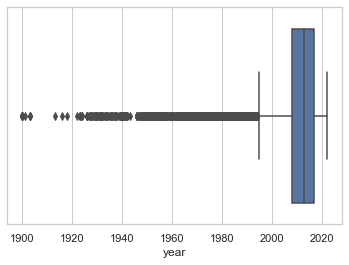

In [23]:
ax = sns.boxplot(x=df["year"])

As we can see, for feature **'year'** there is a negative skew as the offers on older cars become increasingly rarer

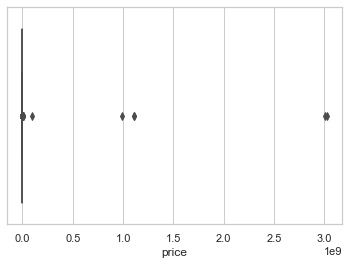

In [24]:
ax = sns.boxplot(x=df["price"])

The **'price'** feature is highly positively skewed.

Both skews need to be taken into account when modelling as non-normal distributed data can have significant impact on model quality

### Date

In [25]:
# posting_date
posting_date = df['posting_date'] #not a copy, but a slice of out dataframe

Posting dates are still of type string, which serve limited value for our analysis. First we need to convert these entries into a datetime value, before proceeding with our analysis.

Let's convert all strings to the appropriate datetime format:

In [26]:
for i, elem in enumerate(posting_date):
    if type(elem) != float: # if not NaN
        datetime_elem = datetime.strptime(elem, '%Y-%m-%dT%H:%M:%S%z') #datetime format
        posting_date.iloc[i] = datetime_elem

C:\Users\Sebastian\anaconda3\envs\mobile\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Having converted our dates, we now can extract specific datetime elements and work with them

<AxesSubplot:xlabel='posting_date', ylabel='Count'>

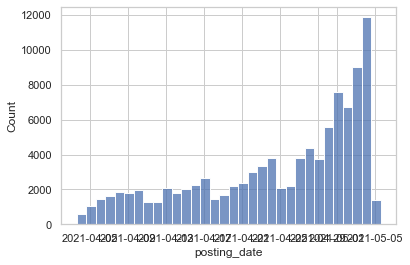

In [31]:
sns.histplot(x=df["posting_date"])

In [35]:
print(min(df['posting_date'].dropna()))
print(max(df['posting_date'].dropna()))

2021-04-04 01:10:23-06:00
2021-05-04 17:22:17-04:00


It is seen in the histogram that there is a higher amount of recent offers

When displaying the min and max value it can be seen that this dataset has a submission time-window of one month